# Optimizer - simple

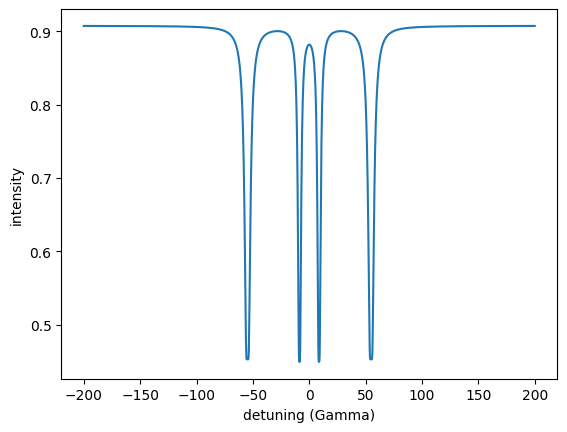

0.4495182509432407


In [1]:
import nexus as nx
import math
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

# ------------------------- Fe layer --------------------------
# the thickness is made to be fitted
# set with boundaries between 0 and 10.000
lay_Fe = nx.Layer(id = "Fe",
                  material = nx.Material.Template(nx.lib.material.Fe_enriched),
                  thickness = nx.Var(2000, 0, 1e5, True))

site = nx.Hyperfine(magnetic_field = 33)

lay_Fe.material.hyperfine_sites = [site]

sample = nx.Sample(id = "simple layer",
                   layers = [lay_Fe],
                   geometry = "f")

beam  = nx.Beam()
beam.LinearSigma()

exp = nx.Experiment(beam = beam,
                    objects = sample,
                    isotope = nx.lib.moessbauer.Fe57,
                    id = "my exp")

detuning = np.arange(-200, 200.1, 0.2)

energy_spec = nx.EnergySpectrum(exp,
                                detuning,
                                electronic = True)

intensity = energy_spec()

plt.plot(detuning, intensity)
plt.xlabel('detuning (Gamma)')
plt.ylabel('intensity')
plt.show()

print(min(intensity))

In [2]:
# define your own Optimizer derived from nx.Optimizer
class NexusOptimizer(nx.Optimizer):
    # this is just the standard initialization of the class
    # keep it like this
    def __init__(self, measurements, id):
        super().__init__(measurements, id)

    # the implementation of the residual, the value to be minimized
    def Residual(self):
        # here we need to calculate the energy spectrum and get its minimum
        intensity = energy_spec()
        # the residual is 'min(intensity) - 0' because we target the intensity minimum to be zero (minimized)
        residual = min(intensity)
        return residual

# initialize the optimizer with the method(s) to be used in the optimizer implementation
optimizer = NexusOptimizer(measurements = [energy_spec],
                           id = "opt id")

# let's see what the residual returns
print(optimizer.Residual())

optimizer.Evaluate()

0.4495182509432407

Run Optimizer instance with id: opt id 

Starting optimizer with 1 provided measurement dependencies and 1 fit parameter(s):

  no. |                           id |       initial value |              min |              max
    0 |                              |                2000 |                0 |           100000

Using 0 equality constraint(s) on parameter(s):

Using 0 inequality constraint(s).

Residual start value: 0.449518


Calling ceres solver with fit method LevMar

Ceres Solver Report: Iterations: 16, Initial cost: 1.010333e-01, Final cost: 1.624058e-06, Termination: CONVERGENCE

Optimizer finished with 1 fit parameter(s):

  no. |                           id |           fit value |       initial value |              min |              max
    0 |                              |              100000 |                2000 |                0 |           100000

and 0 equality constraint(s) on parameter(s):

and 0 inequality constraint(s).

Optimized residu

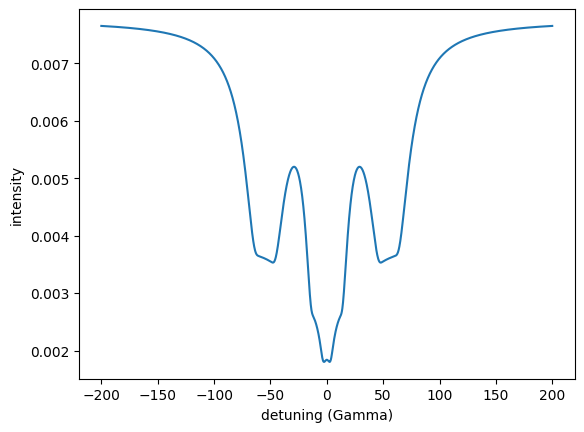

In [3]:
plt.plot(detuning, energy_spec.result)
plt.xlabel('detuning (Gamma)')
plt.ylabel('intensity')
plt.show()